In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import timeit
from statsmodels.tsa.arima_model import ARIMA
from google.colab import drive
drive.mount('/content/drive')

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import libraries for linear regression, exponential smoothening etc
from sklearn.linear_model import LinearRegression
#metrics will help us calcualte mape
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
# Uploading the files
upload = files.upload()

Saving T.csv to T.csv
Saving NFLX.csv to NFLX.csv


In [ ]:
data= pd.read_csv('NFLX.csv')

In [ ]:
data2= pd.read_csv("T.csv")

In [ ]:
print(data2.head(1))
print(data2.tail(1))

         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-02-12  36.330002  36.599998  35.970001  36.369999  27.409388  27750742
            Date       Open       High    Low      Close  Adj Close    Volume
1008  2022-02-11  24.264999  24.459999  24.01  24.129999  24.129999  45381147


In [ ]:
print(data.head(1))
print(data.tail(1))

         Date   Open        High         Low       Close   Adj Close    Volume
0  2018-02-05  262.0  267.899994  250.029999  254.259995  254.259995  11896100
            Date        Open        High         Low       Close   Adj Close  \
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

       Volume  
1008  7782400  


In [ ]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data2.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.shape

(1009, 7)

In [ ]:
data2.shape

(1009, 7)

In [ ]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


The data is continuous here as we see that the missing dates represent either a holiday or a weekend. This implies we need not create a date timestamp

For competitor Analysis, we have taken the dataset of AT&T(HBO max) stock prices as well. 
HBO max being a competitor to Netflix can be a good metric to understand the changes and impact that one has on the other

In [ ]:
#Netflix data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# HBO max data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [ ]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [ ]:
data2.info()

Text(0.5, 1.0, 'Netflix Stock')

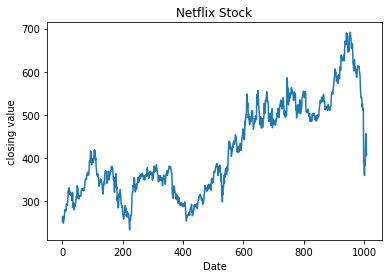

In [ ]:
data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("closing value")
plt.title("Netflix Stock" )

Text(0.5, 1.0, 'HBO(max) Stock')

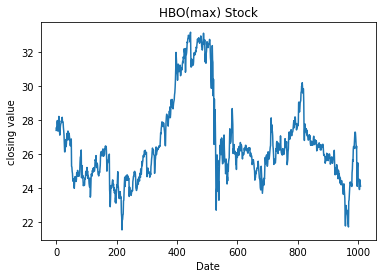

In [ ]:
data2['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("closing value")
plt.title("HBO(max) Stock" )

* From the above graphs , we see that the plot of closing values for netflix dataset show an increasing trend. The HBO max however has a varying trend that has been going down over years. 

* This makes Netflix to be a strong competitor in the streaming industry whose stocks have shows an upward trend. 

* In order to forecast the stock prices of Netflix, we will add an additional column that gives the percentage change between the current and a prior closing value. this percenatge change can be a good metric to forecast since Max and Min of the day does not add much value to the dataset as the stock market always closes with certain value and Max and Min are highly variable and volatile/.


In [ ]:
#pct_change() calcualtes the percenatge change between values at time t and t-1
data["returns"] = data['Adj Close'].pct_change()
data2["returns"]= data2['Adj Close'].pct_change()

In [ ]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,returns
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.045072


Text(0, 0.5, 'Date')

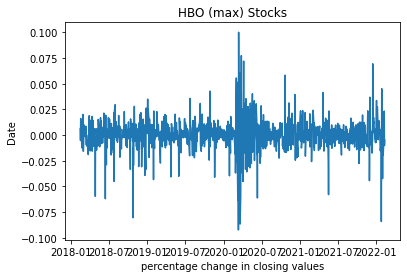

In [ ]:
ax = sns.lineplot(x="Date", y="returns", data=data2)
ax.set_title('HBO (max) Stocks')
ax.set_xlabel('percentage change in closing values')
ax.set_ylabel('Date')

Text(0, 0.5, 'Date')

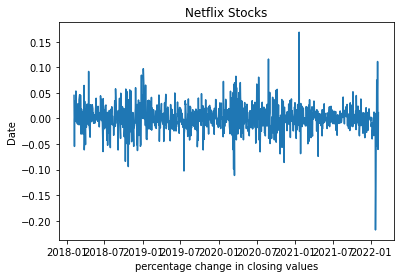

In [ ]:
ax = sns.lineplot(x="Date", y="returns", data=data)
ax.set_title('Netflix Stocks')
ax.set_xlabel('percentage change in closing values')
ax.set_ylabel('Date')

Text(0, 0.5, 'Date')

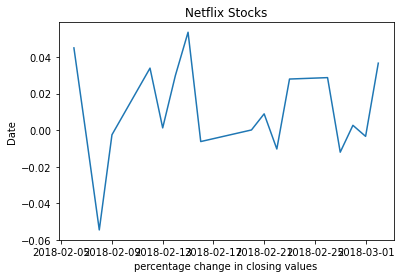

In [ ]:
temp= data[data["Date"]<="2018-03-03"]
ax = sns.lineplot(x="Date", y="returns", data=temp)
ax.set_title('Netflix Stocks')
ax.set_xlabel('percentage change in closing values')
ax.set_ylabel('Date')

The percentage change takes the first differnece between time lags. This one order differencing will remove the trend component from the data.. Thus this dataset will have no trend. 

from the graphs above, we clearly see that there is no seasonality component as such, However there is a sudden increase in the % change in Clsoing values for Netflix post 2020.

In [ ]:
# this will help us get the holidays in US that must be added to the dataset
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [ ]:
date = pd.date_range(start='2018-02-05', end='2022-02-04', freq=us_bd)

In [ ]:
date

In [ ]:
data['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])

In [ ]:
data.head(5)

In [ ]:
date1 = pd.date_range(start='2018-02-12', end='2022-02-11', freq=us_bd)

In [ ]:
data2['Time_Stamp'] = pd.DataFrame(date1,columns=['Date'])

In [ ]:
print(data["Date"].count())
print(data["Time_Stamp"].count())
print(data2["Date"].count())
print(data2["Time_Stamp"].count())

In [ ]:
# Since the US holidays is giving us lesser dates than availabel dates, let us drop the time_stamp variable
data.drop("Time_Stamp",axis=1,inplace=True)
data2.drop("Time_Stamp",axis=1,inplace=True)

In [ ]:
# Since we need to split the data into training and test, we need date to be index column and we also need date as a column to filter hence . let us create a time_stamp with date
data["Time_Stamp"]=data["Date"]
data2["Time_Stamp"]=data2["Date"]

In [ ]:
data.set_index('Date', inplace=True)
data2.set_index("Date", inplace= True)

In [ ]:
data.head(1)
data2.head(1)

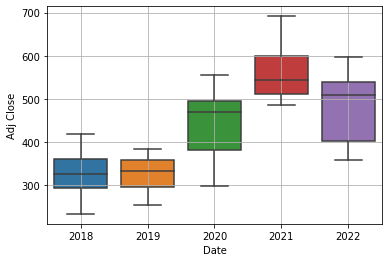

In [ ]:
sns.boxplot(x = data.index.year,y = data['Adj Close'])
plt.grid();

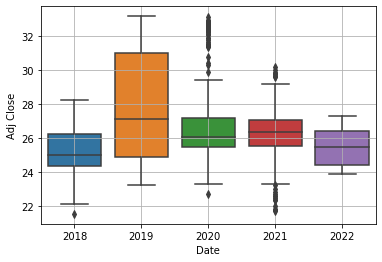

In [ ]:
sns.boxplot(x = data2.index.year,y = data2['Adj Close'])
plt.grid();

Significant outliers in 2020 imply that the 2020 was an unopredictable year for HBO(max). Overall Netflix is on higher side for all years with respect to stick values

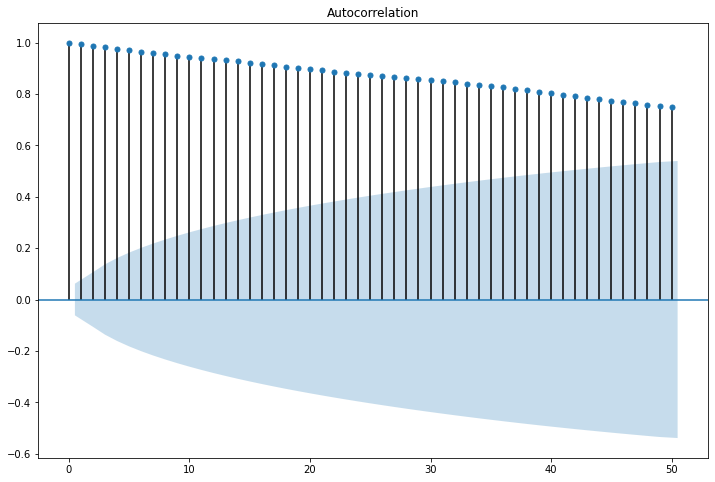

In [ ]:
plt.figure(figsize=(12,8))
plot_acf(data["Adj Close"],lags=50,  ax=plt.gca())
plt.show()

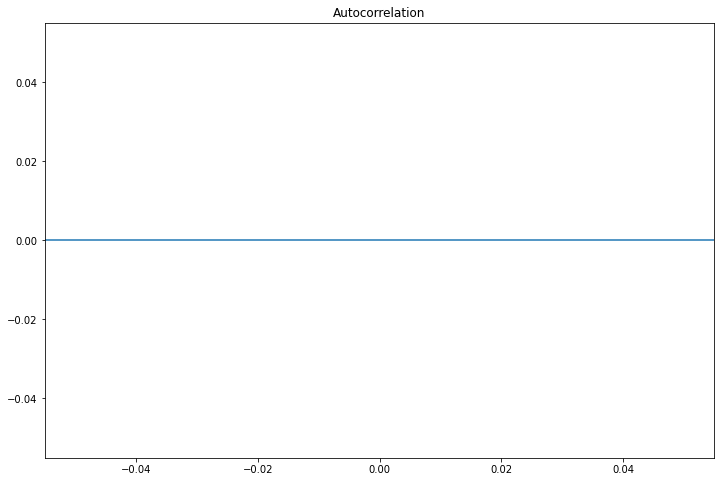

In [ ]:
plt.figure(figsize=(12,8))
plot_acf(data["returns"],lags=50,  ax=plt.gca())
plt.show()

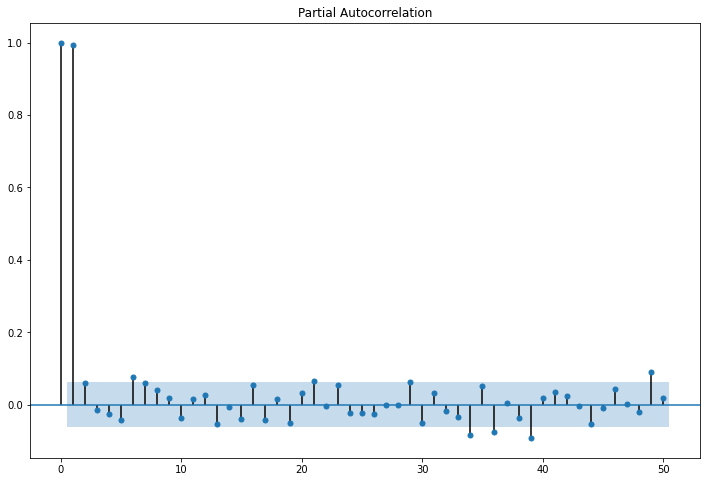

In [ ]:
plt.figure(figsize=(12,8))
plot_pacf(data["Adj Close"], lags=50, ax=plt.gca())
plt.show()

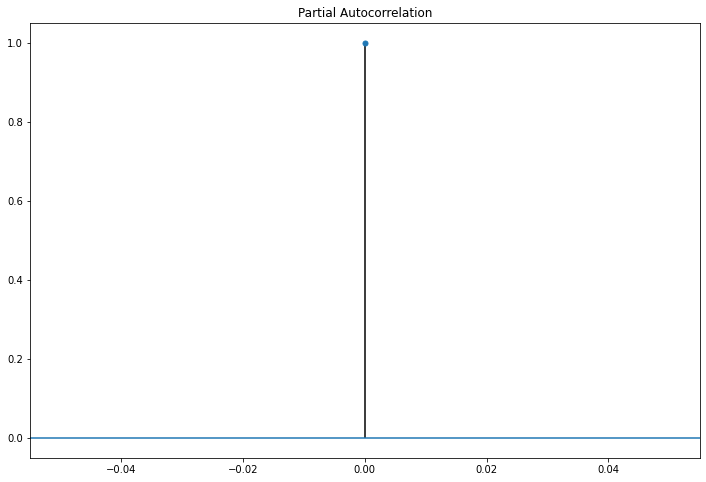

In [ ]:
plt.figure(figsize=(12,8))
plot_pacf(data["returns"], lags=50, ax=plt.gca())
plt.show()

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [ ]:
data.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
returns       1
Time_Stamp    0
dtype: int64

In [ ]:
temp11=data[(data["Time_Stamp"]<='2019-01-01')]["Adj Close"]
temp11.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


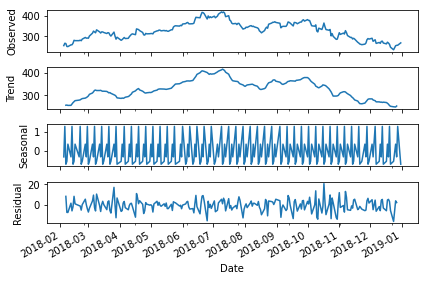

In [ ]:
decomposition = seasonal_decompose(temp11,model='additive', freq=5)
decomposition.plot();

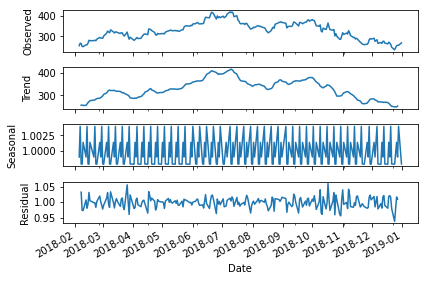

In [ ]:
decomposition = seasonal_decompose(temp11,model='multiplicative', freq=5)
decomposition.plot();

The residuals do not have any patterns,  since both the models have same patterns based on the "Principel of parsimony", choosing the model that is simple is best. Hence we choose additive model

In [ ]:
decomposition = seasonal_decompose(temp1,model='additive', freq=5)
decomposition.plot();

In [ ]:
temp2=data[(data["Year"]<=2019)]["Adj Close"]
temp2.dropna(inplace=True)

In [ ]:
decomposition = seasonal_decompose(temp2,model='additive', freq=5)
decomposition.plot();

In [ ]:
decomposition = seasonal_decompose(temp2,model='multiplicative', freq=5)
decomposition.plot();

In [ ]:
# Split the time series for both Netflix and HBO max into train and test
data['Month'] = data.index.month
data['Year'] = data.index.year
data2['Month'] = data2.index.month
data2['Year'] = data2.index.year

In [ ]:
data[(data["Year"]==2021)& (data["Month"]==2)]

# Spliting data into train and test

In [ ]:
train= data[data["Time_Stamp"]<'2021-02-01']
test=data[data["Time_Stamp"]>='2021-02-01']

# Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [ ]:
dftest=pd.DataFrame(data["returns"].copy())
dftest.dropna(inplace=True)

In [ ]:
dftest.head(5)

,returns
Date,
2018-02-06,0.045072
2018-02-07,-0.004366
2018-02-08,-0.054657
2018-02-09,-0.002519
2018-02-12,0.033992


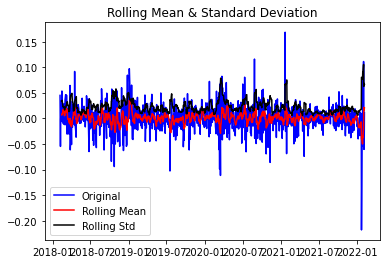

Results of Dickey-Fuller Test:
Test Statistic                -1.438177e+01
p-value                        9.127851e-27
#Lags Used                     5.000000e+00
Number of Observations Used    1.002000e+03
Critical Value (1%)           -3.436893e+00
Critical Value (5%)           -2.864429e+00
Critical Value (10%)          -2.568308e+00
dtype: float64 



In [ ]:
test_stationarity(dftest["returns"])

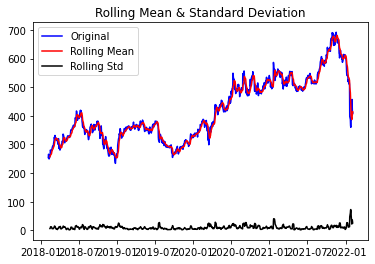

Results of Dickey-Fuller Test:
Test Statistic                   -1.812591
p-value                           0.374229
#Lags Used                        6.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64 



In [ ]:
test_stationarity(data["Adj Close"])

The Null Hypothesis states that the series is not stationary while alternte hypothesis states that the series is stationary. 
Here the p-value is very very low, hence we reject the H0 and state that the series is stationary

This means that the series with % change in closing value has 

* constant mean
* constant standard deviation or variance ( not evident) 
* No seasonality

But the Closing Price is not a stationary data set whihc means that the above conditions are not true for the closing price as a forecasting value

Since the dataset does not have a trend or seasonality, we can try the following models; 
* Linear Regression  model
* Moving Average
* ARIMA with exogenous
* SARIMAX

# Linear Regression for Adj Close variable Forecast

In [ ]:
train_regression=train["Adj Close"].copy()
test_regression=test["Adj Close"].copy()

In [ ]:
train_regression=pd.DataFrame(train_regression)
test_regression=pd.DataFrame(test_regression)

In [ ]:
train_regression.dropna(inplace=True)

In [ ]:
lr = LinearRegression()

In [ ]:
# For linear regression, to avoid random selection we need to provide the time series a numbering column that orders the time series data as per the time scale 
train_time = [i+1 for i in range(len(train_regression))]
test_time = [i+752 for i in range(len(test_regression))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [ ]:
train_regression["regression_time"]=train_time
test_regression["regression_time"]=test_time

In [ ]:
train_regression[train_regression["Adj Close"].isna()]

,Adj Close,regression_time
Date,,


In [ ]:
lr.fit(train_regression[['regression_time']],train_regression['Adj Close'].values)

LinearRegression()

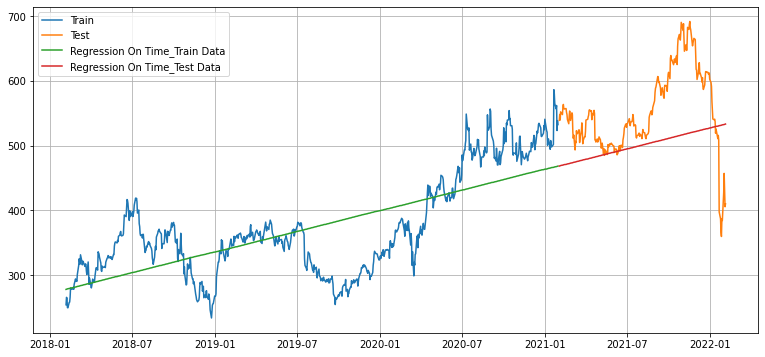

In [ ]:
# create a variable called prediction and store the predicitons for the time rannge from the linear rehression model
train_predictions_regression= lr.predict(train_regression[['regression_time']])
train_regression['RegOnTime'] = train_predictions_regression
test_predictions_regression         = lr.predict(test_regression[['regression_time']])
test_regression['RegOnTime'] = test_predictions_regression
plt.figure(figsize=(13,6))
plt.plot(train_regression['Adj Close'], label='Train')
plt.plot(test_regression['Adj Close'], label='Test')
plt.plot(train_regression['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(test_regression['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data - MAPE
mape_reg= metrics.mean_absolute_percentage_error(test_regression['Adj Close'],test_regression['RegOnTime'])


In [ ]:
results = pd.DataFrame({'Test MAPE': [mape_reg]}, index=["Linear Regression for Adj Close variable"])
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496


# Linear Regression Model for % difference in Adj Close

In [ ]:
train_regression=train["returns"].copy()
test_regression=test["returns"].copy()

In [ ]:
train_regression=pd.DataFrame(train_regression)
test_regression=pd.DataFrame(test_regression)

In [ ]:
train_regression.dropna(inplace=True)

In [ ]:
lr = LinearRegression()

In [ ]:
len(train_regression)

751

In [ ]:
# For linear regression, to avoid random selection we need to provide the time series a numbering column that orders the time series data as per the time scale 
train_time = [i+1 for i in range(len(train_regression))]
test_time = [i+752 for i in range(len(test_regression))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [ ]:
train_regression["regression_time"]=train_time
test_regression["regression_time"]=test_time

In [ ]:
train_regression[train_regression["returns"].isna()]

In [ ]:
lr.fit(train_regression[['regression_time']],train_regression['returns'].values)

In [ ]:
train_predictions_regression= lr.predict(train_regression[['regression_time']])
train_regression['RegOnTime'] = train_predictions_regression
test_predictions_regression         = lr.predict(test_regression[['regression_time']])
test_regression['RegOnTime'] = test_predictions_regression
plt.figure(figsize=(13,6))
plt.plot(train_regression['returns'], label='Train')
plt.plot(test_regression['returns'], label='Test')
plt.plot(train_regression['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(test_regression['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data - MAPE
mape_reg= metrics.mean_absolute_percentage_error(test_regression['returns'],test_regression['RegOnTime'])


In [ ]:
mape_reg

In [ ]:
results_rv = pd.DataFrame({'Test MAPE': [mape_reg]}, index=["Linear Regression for returns variable"])
results=pd.concat([results, results_rv])

# Moving Average Model for Adj Close

In [ ]:
# copy the datframe into a variable
MovingAverages = pd.DataFrame(data["Adj Close"].copy())
MovingAverages.dropna(inplace=True)

In [ ]:
# create moving averages for windows and add them to the dataframe created above
MovingAverages['Trailing_2'] = MovingAverages['Adj Close'].rolling(2).mean()
MovingAverages['Trailing_4'] = MovingAverages['Adj Close'].rolling(4).mean()
MovingAverages['Trailing_6'] = MovingAverages['Adj Close'].rolling(6).mean()
MovingAverages['Trailing_9'] = MovingAverages['Adj Close'].rolling(9).mean()

In [ ]:
MovingAverages.head()

,Adj Close,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
2018-02-05,254.259995,NaN,NaN,NaN,NaN
2018-02-06,265.720001,259.989998,NaN,NaN,NaN
2018-02-07,264.559998,265.140000,NaN,NaN,NaN
2018-02-08,250.100006,257.330002,258.660000,NaN,NaN
2018-02-09,249.470001,249.785004,257.462502,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#Creating train and test set 
train_mv= MovingAverages[MovingAverages.index<'2021-02-01']
test_mv=MovingAverages[MovingAverages.index>='2021-02-01']

In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
Date,,,,,,,
2021-02-01,536.789978,545.059998,531.729980,539.039978,539.039978,3547500,2021-02-01
2021-02-02,542.010010,555.479980,538.929993,548.159973,548.159973,3767600,2021-02-02
2021-02-03,550.169983,550.479980,538.239990,539.450012,539.450012,3172300,2021-02-03
2021-02-04,539.809998,559.479980,537.510010,552.159973,552.159973,5164500,2021-02-04
2021-02-05,552.260010,554.440002,545.479980,550.789978,550.789978,2376200,2021-02-05
...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02


<Figure size 1152x576 with 0 Axes>

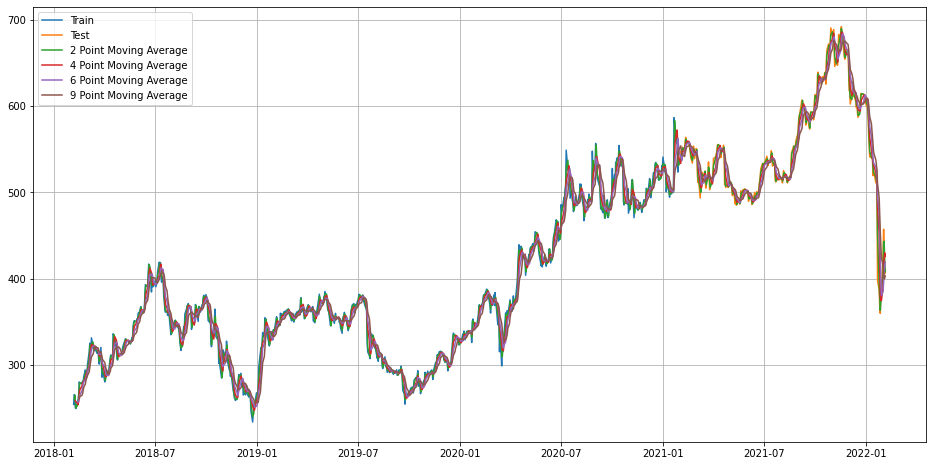

In [ ]:
## Plotting on the test moving averages data with original data

plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.plot(train_mv['Adj Close'], label='Train')
plt.plot(test_mv['Adj Close'], label='Test')

plt.plot(MovingAverages['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverages['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverages['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverages['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
MovingAverages_test.dropna(axis=0,how='any',inplace= True)
MovingAverages_test.head()

,Adj Close,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
2021-02-11,557.590027,560.590027,557.042511,555.186666,550.863329
2021-02-12,556.520020,557.055024,559.192520,555.913340,552.805556
2021-02-16,557.280029,556.900024,558.745026,556.995016,553.818895
2021-02-17,551.340027,554.310028,555.682526,557.565023,555.140008
2021-02-18,548.219971,549.779999,553.340012,555.756684,554.702230


In [ ]:
## Test Data - MAPE
mape_reg_2= metrics.mean_absolute_percentage_error(test['Adj Close'],test_mv['Trailing_2'])

## Test Data - MAPE
mape_reg_4= metrics.mean_absolute_percentage_error(test['Adj Close'],test_mv['Trailing_4'])

## Test Data - MAPE
mape_reg_6= metrics.mean_absolute_percentage_error(test['Adj Close'],test_mv['Trailing_6'])


## Test Data - MAPE
mape_reg_9= metrics.mean_absolute_percentage_error(test['Adj Close'],test_mv['Trailing_9'])


In [ ]:
results = pd.DataFrame()


In [ ]:
results_mv_2 = pd.DataFrame({'Test MAPE': [mape_reg_2]}, index=["Trailing 2_Moving Average_ Adj Close price"])
results=pd.concat([results, results_mv_2])
results_mv_4 = pd.DataFrame({'Test MAPE': [mape_reg_4]}, index=["Trailing 4_Moving Average_Adj Close Price"])
results=pd.concat([results, results_mv_4])
results_mv_6 = pd.DataFrame({'Test MAPE': [mape_reg_6]}, index=["Trailing 6_Moving Average_Adj Close Price"])
results=pd.concat([results, results_mv_6])
results_mv_9 = pd.DataFrame({'Test MAPE': [mape_reg_9]}, index=["Trailing 9_Moving Average_Adj Close Price"])
results=pd.concat([results, results_mv_9])

In [ ]:
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496
Trailing 2_Moving Average_ Adj Close price,0.007490
Trailing 4_Moving Average_Adj Close Price,0.015140
Trailing 6_Moving Average_Adj Close Price,0.020604
Trailing 9_Moving Average_Adj Close Price,0.027287


In [ ]:
results

,Test MAPE
Trailing 2_Moving Average_ Adj Close price,0.007458
Trailing 4_Moving Average_Adj Close Price,0.014954
Trailing 6_Moving Average_Adj Close Price,0.020338
Trailing 9_Moving Average_Adj Close Price,0.026960


# Moving Average Models for Returns

In [ ]:
# copy the datframe into a variable
MovingAverages_train = pd.DataFrame(train["returns"].copy())
MovingAverages_train.dropna(inplace=True)

In [ ]:
# create moving averages for windows and add them to the dataframe created above
MovingAverages_train['Trailing_2'] = MovingAverages_train['returns'].rolling(2).mean()
MovingAverages_train['Trailing_4'] = MovingAverages_train['returns'].rolling(4).mean()
MovingAverages_train['Trailing_6'] = MovingAverages_train['returns'].rolling(6).mean()
MovingAverages_train['Trailing_9'] = MovingAverages_train['returns'].rolling(9).mean()

In [ ]:
MovingAverages_train.head()

In [ ]:
# copy the datframe into a variable
MovingAverages_test = pd.DataFrame(test["returns"].copy())
MovingAverages_test.dropna(inplace=True)

In [ ]:
# create moving averages for windows and add them to the dataframe created above
MovingAverages_test['Trailing_2'] = MovingAverages_test['returns'].rolling(2).mean()
MovingAverages_test['Trailing_4'] = MovingAverages_test['returns'].rolling(4).mean()
MovingAverages_test['Trailing_6'] = MovingAverages_test['returns'].rolling(6).mean()
MovingAverages_test['Trailing_9'] = MovingAverages_test['returns'].rolling(9).mean()

In [ ]:
## Plotting on the test moving averages data with original data

plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.plot(MovingAverages_train['returns'], label='Train')
plt.plot(MovingAverages_test['returns'], label='Test')

plt.plot(MovingAverages_train['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverages_train['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverages_train['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverages_train['Trailing_9'],label = '9 Point Moving Average')


plt.plot(MovingAverages_test['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverages_test['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverages_test['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverages_test['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
MovingAverages_test.dropna(axis=0,how='any',inplace= True)
MovingAverages_test.head()

In [ ]:
## Test Data - MAPE
mape_reg= metrics.mean_absolute_percentage_error(MovingAverages_test['returns'],MovingAverages_test['Trailing_2'])


In [ ]:
results_mv_2 = pd.DataFrame({'Test MAPE': [mape_reg]}, index=["Trailing 2_Moving Average_returns"])
results=pd.concat([results, results_mv_2])

In [ ]:
results

In [ ]:
## Test Data - MAPE
mape_reg_4= metrics.mean_absolute_percentage_error(MovingAverages_test['returns'],MovingAverages_test['Trailing_4'])

## Test Data - MAPE
mape_reg_6= metrics.mean_absolute_percentage_error(MovingAverages_test['returns'],MovingAverages_test['Trailing_6'])


## Test Data - MAPE
mape_reg_9= metrics.mean_absolute_percentage_error(MovingAverages_test['returns'],MovingAverages_test['Trailing_9'])


In [ ]:
results_mv_4 = pd.DataFrame({'Test MAPE': [mape_reg_4]}, index=["Trailing 4_Moving Average_returns"])
results=pd.concat([results, results_mv_4])
results_mv_6 = pd.DataFrame({'Test MAPE': [mape_reg_6]}, index=["Trailing 6_Moving Average_returns"])
results=pd.concat([results, results_mv_6])
results_mv_9 = pd.DataFrame({'Test MAPE': [mape_reg_9]}, index=["Trailing 9_Moving Average_returns"])
results=pd.concat([results, results_mv_9])

In [ ]:
results

# Exponential Smoothening for Adj Close



In [ ]:
train_s=train["Adj Close"].copy()
test_s=test["Adj Close"].copy()

In [ ]:
train_s=pd.DataFrame(train_s)
test_s=pd.DataFrame(test_s)

In [ ]:
train_s

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2021-01-25,556.780029
2021-01-26,561.929993
2021-01-27,523.280029


In [ ]:
model_DES = Holt(train_s)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_DES = model_DES.fit(optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
print(model_DES.params)

{'smoothing_level': 0.8796170924076167, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 255.1772005091666, 'initial_slope': 0.3694861937108583, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
DES_predict =  model_DES.forecast(len(test_s))
DES_predict.shape
test_s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Adj Close
Date,
2021-02-01,539.039978
2021-02-02,548.159973
2021-02-03,539.450012
2021-02-04,552.159973
2021-02-05,550.789978
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
map_exp=metrics.mean_absolute_percentage_error(test_s,DES_predict)
results_exp = pd.DataFrame({'Test MAPE': [map_exp]}, index=["Double Exponential Smoothening_Adj Close"])
results=pd.concat([results, results_exp])

In [ ]:
#results.drop("Double Exponential Smoothening_Adj Close",axis=0,inplace=True)
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496
Trailing 2_Moving Average_ Adj Close price,0.007490
Trailing 4_Moving Average_Adj Close Price,0.015140
Trailing 6_Moving Average_Adj Close Price,0.020604
Trailing 9_Moving Average_Adj Close Price,0.027287
Double Exponential Smoothening_Adj Close,0.093770


# Exponential Smoothening for returns

In [ ]:
train_s=train["returns"].copy()
test_s=test["returns"].copy()

In [ ]:
train_s=pd.DataFrame(train_s)
test_s=pd.DataFrame(test_s)

In [ ]:
train_s

,returns
Date,
2018-02-05,NaN
2018-02-06,0.045072
2018-02-07,-0.004366
2018-02-08,-0.054657
2018-02-09,-0.002519
...,...
2021-01-25,-0.014845
2021-01-26,0.009250
2021-01-27,-0.068781


In [ ]:
train_s.dropna(inplace=True)

In [ ]:
model_DES = Holt(train_s)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_DES_autofit = model_DES.fit(optimized=True)

In [ ]:
model_DES_autofit.params

{'damping_slope': nan,
 'initial_level': 3.57825973087347e-05,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 2.701989453767148e-06,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 5.409243193681242e-09,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [ ]:
DES_predict =  model_DES_autofit.forecast(len(test_s))
DES_predict.shape
DES_predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


751     0.002068
752     0.002070
753     0.002073
754     0.002076
755     0.002078
          ...   
1003    0.002749
1004    0.002751
1005    0.002754
1006    0.002757
1007    0.002759
Length: 257, dtype: float64

In [ ]:
map_exp_r=metrics.mean_absolute_percentage_error(test_s,DES_predict)
results_exp_r = pd.DataFrame({'Test MAPE': [map_exp_r]}, index=["Double Exponential Smoothening_returns"])
results=pd.concat([results, results_exp_r])

In [ ]:
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496
Trailing 2_Moving Average_ Adj Close price,0.007490
Trailing 4_Moving Average_Adj Close Price,0.015140
Trailing 6_Moving Average_Adj Close Price,0.020604
Trailing 9_Moving Average_Adj Close Price,0.027287
Double Exponential Smoothening_returns,1.298531


# SARIMAX - SARIMA with Exogenos variables for Adj Close




In [ ]:
data1 = data.merge(data2, left_on = ['Time_Stamp'], right_on = ['Time_Stamp'], how = 'left')

In [ ]:
data1.dropna(inplace=True)

In [ ]:
data1["date"]=data1["Time_Stamp"].copy()
data1.set_index("Time_Stamp", inplace=True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2018-02-13 to 2022-02-04
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Open_x       1003 non-null   float64       
 1   High_x       1003 non-null   float64       
 2   Low_x        1003 non-null   float64       
 3   Close_x      1003 non-null   float64       
 4   Adj Close_x  1003 non-null   float64       
 5   Volume_x     1003 non-null   int64         
 6   returns_x    1003 non-null   float64       
 7   Month_x      1003 non-null   int64         
 8   Year_x       1003 non-null   int64         
 9   Open_y       1003 non-null   float64       
 10  High_y       1003 non-null   float64       
 11  Low_y        1003 non-null   float64       
 12  Close_y      1003 non-null   float64       
 13  Adj Close_y  1003 non-null   float64       
 14  Volume_y     1003 non-null   float64       
 15  returns_y    1003 non-null   float64 

In [ ]:
train_ar=pd.DataFrame(data1[data1["date"]<'2021-02-12']["Adj Close_x"])
test_ar=pd.DataFrame(data1[data1["date"]>='2021-02-12']["Adj Close_x"])

In [ ]:
train_ex=pd.DataFrame(data1[data1["date"]<('2021-02-12')][["Volume_x","High_x","Low_x","Open_x","Adj Close_y"]])
test_ex=pd.DataFrame(data1[data1["date"]>=('2021-02-12')][["Volume_x","High_x","Low_x","Open_x","Adj Close_y"]])

In [ ]:
train_ar

,Adj Close_x
Time_Stamp,
2018-02-13,258.269989
2018-02-14,266.000000
2018-02-15,280.269989
2018-02-16,278.519989
2018-02-20,278.549988
...,...
2021-02-05,550.789978
2021-02-08,547.919983
2021-02-09,559.070007


In [ ]:
train_ex

,Volume_x,High_x,Low_x,Open_x,Adj Close_y
Time_Stamp,,,,,
2018-02-13,6855200,261.410004,254.699997,257.290009,27.582724
2018-02-14,10972000,269.880005,260.329987,260.470001,27.439537
2018-02-15,10759700,280.500000,267.630005,270.029999,27.884176
2018-02-16,8312400,281.959991,275.690002,278.730011,27.989683
2018-02-20,7769000,285.809998,276.609985,277.739990,27.710842
...,...,...,...,...,...
2021-02-05,2376200,554.440002,545.479980,552.260010,26.339331
2021-02-08,2791700,555.000000,543.700012,555.000000,26.193657
2021-02-09,3703500,566.000000,543.000000,546.000000,26.057091


In [ ]:
train_ex.isna().sum()

Volume_x       0
High_x         0
Low_x          0
Open_x         0
Adj Close_y    0
dtype: int64

In [ ]:
import itertools

In [ ]:
# Since the stock data is only for 5 days a week, we must take the time in SARIMAX to be 5
p = q = range(0,3)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(0, 1, 0, 5)
Model: (0, 0, 2)(0, 1, 1, 5)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar['Adj Close_x'],
                                            exog=train_ex,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
   

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm


In [ ]:
SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar['Adj Close_x'],
                                            exog=train_ex,
                                            order=(0,0,2),
                                            seasonal_order=(0,0,2,5),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_SARIMA = SARIMA_model.fit()
print(results_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                       Adj Close_x   No. Observations:                  755
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -2019.773
Date:                           Wed, 20 Apr 2022   AIC                           4059.546
Time:                                   02:00:52   BIC                           4105.639
Sample:                                        0   HQIC                          4077.315
                                           - 755                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Volume_x     3.959e-08    2.8e-08      1.413      0.158   -1.53e-08    9.45e-08
High_x          0.8030      0.019     41

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
 pred = results_SARIMA.get_forecast(steps=len(test_ar),exog=test_ex)
    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
pred.predicted_mean

755     555.879569
756     558.856137
757     548.059415
758     541.067809
759     541.455596
           ...    
998     420.393941
999     448.340597
1000    434.167451
1001    414.211579
1002    403.366879
Length: 248, dtype: float64

In [ ]:
map_sx=metrics.mean_absolute_percentage_error(test_ar,pred.predicted_mean)
results_sx = pd.DataFrame({'Test MAPE': [map_sx]}, index=["SARIMAX Adj Close"])
results=pd.concat([results, results_sx])

In [ ]:
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496
Trailing 2_Moving Average_ Adj Close price,0.007490
Trailing 4_Moving Average_Adj Close Price,0.015140
Trailing 6_Moving Average_Adj Close Price,0.020604
Trailing 9_Moving Average_Adj Close Price,0.027287
Double Exponential Smoothening_Adj Close,0.093770
SARIMAX Adj Close,0.005894


In [ ]:
# Since the stock data is only for 5 days a week, we must take the time in SARIMAX to be 5
p = q = range(0,3)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar['Adj Close_x'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
SARIMA_model = sm.tsa.statespace.SARIMAX(data1['Adj Close_x'],
                                            order=(2,1,2),
                                            seasonal_order=(1,1,2,5),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_SARIMA = SARIMA_model.fit()
print(results_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                       Adj Close_x   No. Observations:                 1003
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 5)   Log Likelihood               -3771.132
Date:                           Wed, 20 Apr 2022   AIC                           7558.264
Time:                                   02:02:13   BIC                           7597.397
Sample:                                        0   HQIC                          7573.149
                                          - 1003                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2666      0.855     -1.481      0.139      -2.943       0.410
ar.L2         -0.3645      0.576     -0.633

In [ ]:
pred_forecast = results_SARIMA.get_forecast(steps=12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
forecast=pred_forecast.predicted_mean.tolist()

In [ ]:
forecast

[408.02636680334365,
 406.60216924178417,
 409.4754494167571,
 410.4599130178899,
 411.84471189908004,
 412.0874765791479,
 411.6471436264312,
 412.6729811180328,
 412.77242418341825,
 412.87408580953297,
 413.89186427948994,
 413.8356466821622]

In [ ]:
data1.tail(1)

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,returns_x,Month_x,Year_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,returns_y,Month_y,Year_y,date
Time_Stamp,,,,,,,,,,,,,,,,,,,
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,0.011267,2,2022,24.51,24.5399,23.98,24.08,24.08,52657999.0,-0.019544,2.0,2022.0,2022-02-04


In [ ]:
date = pd.date_range(start='2022-02-05', end='2022-02-23', freq=us_bd)

In [ ]:
date

DatetimeIndex(['2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
df_forecast=pd.DataFrame()
df_forecast["Date"]=date
df_forecast["Adj Close"]=forecast

In [ ]:
df_forecast.set_index("Date")

,Adj Close
Date,
2022-02-07,408.026367
2022-02-08,406.602169
2022-02-09,409.475449
2022-02-10,410.459913
2022-02-11,411.844712
2022-02-14,412.087477
2022-02-15,411.647144
2022-02-16,412.672981
2022-02-17,412.772424


In [ ]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12 non-null     datetime64[ns]
 1   Adj Close  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


In [ ]:
#data_f=data[data[["Date","Adj Close"]]]
data_f= data[["Date","Adj Close"]]

In [ ]:
data_f=data_f[data_f["Date"]>="2021-02-05"]

In [ ]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12 non-null     datetime64[ns]
 1   Adj Close  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


In [ ]:
frame=data_f,df_forecast
df_new=pd.concat(frame)


In [ ]:
df_new

<Figure size 1152x576 with 0 Axes>

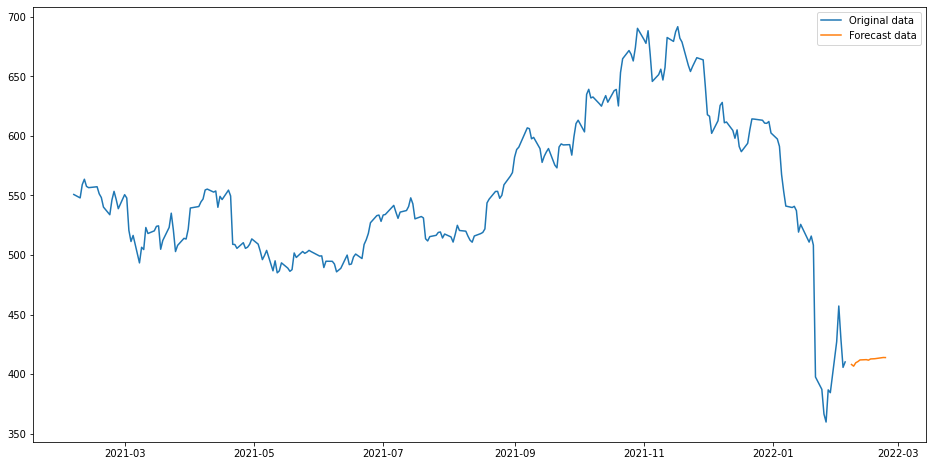

In [ ]:
## Plotting on the test moving averages data with original data

plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.plot(data_f["Date"],data_f['Adj Close'], label='Original data')
plt.plot(df_forecast["Date"],df_forecast['Adj Close'], label='Forecast data')
plt.legend(loc="best")

plt.show()

# SARIMAX for returns %

In [ ]:
train_ar=pd.DataFrame(data1[data1["date"]<'2021-02-12'][["returns_x"]])
test_ar=pd.DataFrame(data1[data1["date"]>='2021-02-12'][["returns_x"]])

In [ ]:
train_ex=pd.DataFrame(data1[data1["date"]<'2021-02-12'][["returns_x","Volume_x","High_x","Low_x","Open_x","returns_y"]])
test_ex=pd.DataFrame(data1[data1["date"]>='2021-02-12'][["returns_x","Volume_x","High_x","Low_x","Open_x","returns_y"]])

In [ ]:
train_ar.isna().sum()

In [ ]:
test_ex.isna().sum()

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(SARIMA_AIC)


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar['returns_x'],
                                            exog=train_ex,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
SARIMA_model = sm.tsa.statespace.SARIMAX(train_ar['returns_x'],
                                            exog=train_ex,
                                            order=(0,0,0),
                                            seasonal_order=(0,0,0,5),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_SARIMA_r = SARIMA_model.fit()
print(results_SARIMA_r.summary())

In [ ]:
 pred1 = results_SARIMA_r.get_forecast(steps=len(test_ar),exog=test_ex)
    


In [ ]:
map_sx_r=metrics.mean_absolute_percentage_error(test_ar,pred1.predicted_mean)
results_sx_r = pd.DataFrame({'Test MAPE': [map_sx_r]}, index=["SARIMAX returns"])
results=pd.concat([results, results_sx_r])

In [ ]:
results

,Test MAPE
Linear Regression for Adj Close variable,0.112496
Trailing 2_Moving Average_ Adj Close price,0.007490
Trailing 4_Moving Average_Adj Close Price,0.015140
Trailing 6_Moving Average_Adj Close Price,0.020604
Trailing 9_Moving Average_Adj Close Price,0.027287
Double Exponential Smoothening_Adj Close,0.093770
SARIMAX Adj Close,0.005894


# Forecasting with best model